### Importing the data

In [1]:
# use these links to do so:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas_profiling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve,auc,roc_auc_score,classification_report
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import lightgbm as lgb


os.chdir("C:/Users/Shivam Mishra/Documents/INSAID/Telecom")
data=pd.read_csv("Churn.csv")

### Understanding the data

In [2]:
train=data.copy()

In [3]:
#let's take a view of the data
train.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
#shape of the data
train.shape

(7043, 21)

##### There are 7043 examples and 21 features

In [5]:
#Let's llok at the info of the data
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

##### Convert datatypes

In [6]:
#SeniorCitizen must be an object train type and totalcharges should be float variable
train["SeniorCitizen"]=train["SeniorCitizen"].astype("object")
train["TotalCharges"]=pd.to_numeric(train["TotalCharges"],errors='coerce')
data['TotalCharges']=pd.to_numeric(data['TotalCharges'],errors='coerce')

In [7]:
train.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

#### There are 11 missing values in TotalCharges variable

In [8]:
##let's look at the description of the data
train.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,2283.300441
std,24.559481,30.090047,2266.771362
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3794.737500
max,72.000000,118.750000,8684.800000


### Data Manipulation

In [9]:
## Imputing Missing Values
train["TotalCharges"]=train["TotalCharges"].fillna(train["TotalCharges"].mean())
data["TotalCharges"]=data["TotalCharges"].fillna(data["TotalCharges"].mean())

In [10]:
train.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

######  Now converting data in numeric form for modeling

In [11]:
for i in range(0,train.shape[1]):
    if train.iloc[:,i].dtypes=="object":
        train.iloc[:,i]=train.iloc[:,i].astype("category")
        train.iloc[:,i]=train.iloc[:,i].cat.codes


In [12]:
train1=train.copy()

In [13]:
train.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,29.85,0
1,3962,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1889.50,0
2,2564,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,108.15,1
3,5535,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1840.75,0
4,6511,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,151.65,1


In [14]:
### Drop CustomerID variable as it is of no use for model
train.drop(['customerID'],axis=1,inplace=True)

In [15]:
# selecting continuous variables 
cnames=["tenure","MonthlyCharges","TotalCharges"]

In [16]:
### Normalizing the continuous featurs
for i in cnames:
    train[i]=(train[i]-train[i].mean())/(train[i].std())

In [17]:
## Finally look at the preprocessed data which we will use for training the model
train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,-1.277354,0,1,0,0,2,0,0,0,0,0,1,2,-1.160241,-0.994901,0
1,1,0,0,0,0.066323,1,0,0,2,0,2,0,0,0,1,0,3,-0.259611,-0.173863,0
2,1,0,0,0,-1.236636,1,0,0,2,2,0,0,0,0,0,1,3,-0.362635,-0.960331,1
3,1,0,0,0,0.514215,0,1,0,2,0,2,2,0,0,1,0,0,-0.746482,-0.195386,0
4,0,0,0,0,-1.236636,1,0,1,0,0,0,0,0,0,0,1,2,0.197351,-0.941126,1


### Data Visualization

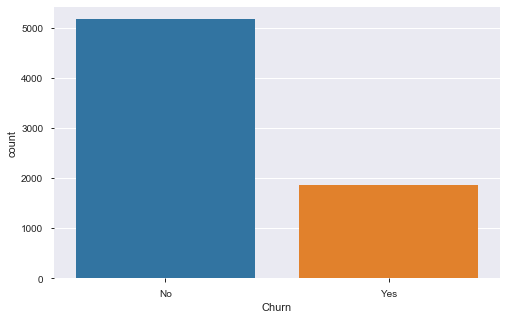

In [18]:
#visualizing classes of target variable
plt.figure(figsize=(8,5))
sns.countplot(data["Churn"])

###### Thhere are very less number of positive class compared to negative class

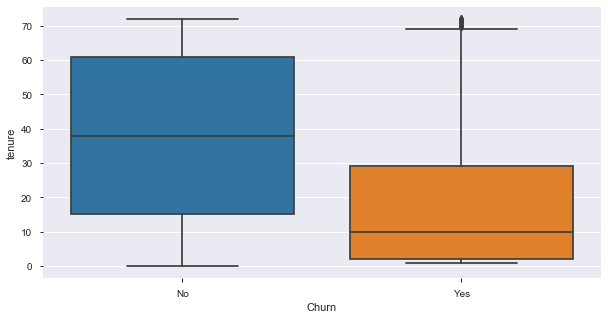

In [19]:
plt.figure(figsize=(10,5))
sns.boxplot(data['Churn'],data['tenure'])

So if  tenure is less then there are more chance that cutomer will churn

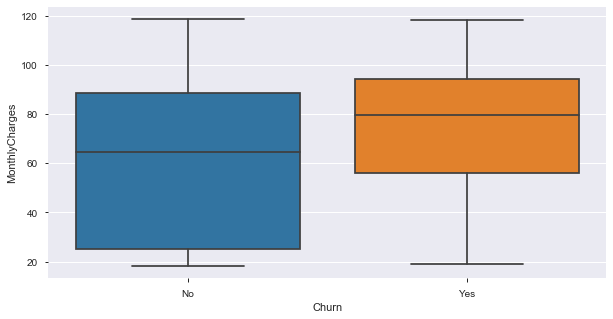

In [20]:
plt.figure(figsize=(10,5))
sns.boxplot(data['Churn'],data['MonthlyCharges'])

If monthly charge is high or between 55-90 then customers will churn out

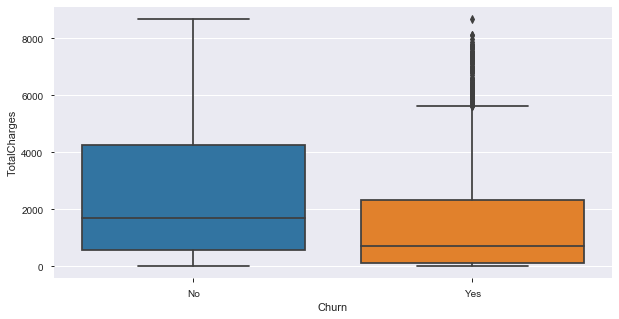

In [21]:
plt.figure(figsize=(10,5))
sns.boxplot(data['Churn'],data['TotalCharges'])

If total charge is less i.e(between 0 to 2500) then customers are more likely to churn out

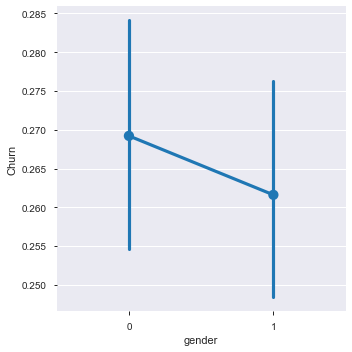

In [22]:
sns.catplot(x="gender",y="Churn",kind='point',data=train)

In [23]:
#Lets look at the top features
X = train1.iloc[:,1:20]  #independent columns
y = train1.iloc[:,-1]    #target column i.e price range
#apply SelectKBest class to extract top 16 best features
bestfeatures = SelectKBest(score_func=chi2, k=16)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  
print(featureScores.nlargest(16,'Score'))  

               Specs          Score
18      TotalCharges  629275.029414
4             tenure   16278.923685
17    MonthlyCharges    3680.787699
14          Contract    1115.780167
8     OnlineSecurity     551.611529
11       TechSupport     523.303866
9       OnlineBackup     230.086520
10  DeviceProtection     191.303140
1      SeniorCitizen     134.351545
3         Dependents     133.036443
15  PaperlessBilling     105.680863
2            Partner      82.412083
16     PaymentMethod      58.492250
7    InternetService       9.821028
6      MultipleLines       9.746921
13   StreamingMovies       8.235399


TotalCharges, tenure, MonthlyCharges, Contract and OnlineSecurity are the top five important variables

###### Females are more likely to churn than males

In [24]:
### Conclusion: What all did you understand from the above charts
#Monthly charge should be high
#total charge should be low
#females are more likely to churn
#positive class are less than the negaive class
#TotalCharges, tenure, MonthlyCharges, Contract and OnlineSecurity are the top five important variables

### Implement Machine Learning Models

In [25]:
#splitting the data
X=train.drop(['Churn'],axis=1) #independent variables
y=train['Churn'] #target variable
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,shuffle=True)

In [26]:
print(X_train.shape,"/n",y_train.shape)

(5634, 19) /n (5634,)


#### Logistic Regression

In [27]:
logit=LogisticRegression(random_state=42)
logit_fit=logit.fit(X_train,y_train)
logit_pred=logit.predict(X_test)

In [28]:
cm_logit=pd.crosstab(y_test,logit_pred)

In [29]:
cm_logit

col_0,0,1
Churn,,
0,934,102
1,156,217


In [30]:
print(classification_report(y_test,logit_pred))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.68      0.58      0.63       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.82      0.81      1409



#### Decision Tree

In [31]:
DT=DecisionTreeClassifier(random_state=42)
DT_fit=DT.fit(X_train,y_train)
DT_pred=DT_fit.predict(X_test)

In [32]:
cm_DT=pd.crosstab(y_test,DT_pred)

In [33]:
cm_DT

col_0,0,1
Churn,,
0,833,203
1,184,189


In [34]:
print(classification_report(y_test,DT_pred))

              precision    recall  f1-score   support

           0       0.82      0.80      0.81      1036
           1       0.48      0.51      0.49       373

    accuracy                           0.73      1409
   macro avg       0.65      0.66      0.65      1409
weighted avg       0.73      0.73      0.73      1409



#### Random Forest

In [35]:
RF=RandomForestClassifier(random_state=42)
RF_fit=RF.fit(X_train,y_train)
RF_pred=RF_fit.predict(X_test)

In [36]:
cm_RF=pd.crosstab(y_test,RF_pred)

In [37]:
cm_RF

col_0,0,1
Churn,,
0,945,91
1,199,174


In [38]:
print(classification_report(y_test,RF_pred))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.66      0.47      0.55       373

    accuracy                           0.79      1409
   macro avg       0.74      0.69      0.71      1409
weighted avg       0.78      0.79      0.78      1409



### Smote 

In [39]:
sm = SMOTE(random_state=42)
X_train_smote,y_train_smote=sm.fit_sample(X_train,y_train)
X_test_smote,y_test_smote=sm.fit_sample(X_test,y_test)
print(X_train_smote.shape)
print(X_test_smote.shape)

(8276, 19)
(2072, 19)


In [40]:
smote_logit=LogisticRegression(random_state=42)
smote_model_logit=smote_logit.fit(X_train_smote,y_train_smote)
smote_logit_pred=smote_model_logit.predict(X_test)

In [41]:
cm_logit_smote=pd.crosstab(y_test,smote_logit_pred)

In [42]:
cm_logit_smote

col_0,0,1
Churn,,
0,744,292
1,61,312


In [43]:
print(classification_report(y_test,smote_logit_pred))

              precision    recall  f1-score   support

           0       0.92      0.72      0.81      1036
           1       0.52      0.84      0.64       373

    accuracy                           0.75      1409
   macro avg       0.72      0.78      0.72      1409
weighted avg       0.82      0.75      0.76      1409



### lightgbm

In [44]:
#parameters for lightgbm
param = {'objective' : "binary", 
               'boost':"gbdt",
               'metric':"auc",
               'boost_from_average':"false",
               'num_threads':8,
               'learning_rate' : 0.05,
               'num_leaves' : 10,
               'max_depth':-1,
               'tree_learner' : "serial",
               'feature_fraction' : 0.05,
               'bagging_freq' : 5,
               'bagging_fraction' : 0.4,
               'min_data_in_leaf' : 20,
               'min_sum_hessian_in_leaf' : 10.0,
               'verbosity' : 1}

In [45]:
lgb_train=lgb.Dataset(X_train,label=y_train)
lgb_test=lgb.Dataset(X_test,label=y_test)

In [46]:
num_rounds=10000
lgbm= lgb.train(param,lgb_train,num_rounds,valid_sets=[lgb_train,lgb_test],verbose_eval=1000,early_stopping_rounds = 3000)
lgbm

Training until validation scores don't improve for 3000 rounds
[1000]	training's auc: 0.876414	valid_1's auc: 0.862091
[2000]	training's auc: 0.88896	valid_1's auc: 0.856693
[3000]	training's auc: 0.897378	valid_1's auc: 0.851284
Early stopping, best iteration is:
[570]	training's auc: 0.869773	valid_1's auc: 0.867023


In [47]:
lgbm_predict_prob=lgbm.predict(X_test,random_state=42,num_iteration=lgbm.best_iteration)
lgbm_predict=np.where(lgbm_predict_prob>=0.4,1,0)

In [48]:
CM_lgbm=pd.crosstab(y_test,lgbm_predict)
CM_lgbm

col_0,0,1
Churn,,
0,891,145
1,112,261


In [49]:
print(classification_report(y_test,lgbm_predict))

              precision    recall  f1-score   support

           0       0.89      0.86      0.87      1036
           1       0.64      0.70      0.67       373

    accuracy                           0.82      1409
   macro avg       0.77      0.78      0.77      1409
weighted avg       0.82      0.82      0.82      1409



### Model Evaluation

In [50]:
##Logistic Regression
print(classification_report(y_test,logit_pred))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.68      0.58      0.63       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.82      0.81      1409



In [51]:
##Decision Tree
print(classification_report(y_test,DT_pred))

              precision    recall  f1-score   support

           0       0.82      0.80      0.81      1036
           1       0.48      0.51      0.49       373

    accuracy                           0.73      1409
   macro avg       0.65      0.66      0.65      1409
weighted avg       0.73      0.73      0.73      1409



In [52]:
#Random Forest
print(classification_report(y_test,RF_pred))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.66      0.47      0.55       373

    accuracy                           0.79      1409
   macro avg       0.74      0.69      0.71      1409
weighted avg       0.78      0.79      0.78      1409



In [53]:
## Smote
print(classification_report(y_test,smote_logit_pred))

              precision    recall  f1-score   support

           0       0.92      0.72      0.81      1036
           1       0.52      0.84      0.64       373

    accuracy                           0.75      1409
   macro avg       0.72      0.78      0.72      1409
weighted avg       0.82      0.75      0.76      1409



In [54]:
##lightgbm
print(classification_report(y_test,lgbm_predict))

              precision    recall  f1-score   support

           0       0.89      0.86      0.87      1036
           1       0.64      0.70      0.67       373

    accuracy                           0.82      1409
   macro avg       0.77      0.78      0.77      1409
weighted avg       0.82      0.82      0.82      1409



### Final Conclusions

Lightgbm model is giving Best accuracy and F1-score hecne we will use lightgbm model.